In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


#decision Tree Regression machine learning
from sklearn.tree import DecisionTreeRegressor
#linear regression machine learning
from sklearn.linear_model import LinearRegression
#for labeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#for MAE mean absolute error
from sklearn.metrics import mean_absolute_error

#for RMSE root mean 
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("NFLX Historical data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3334 entries, 0 to 3333
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3334 non-null   object 
 1   Price     3334 non-null   float64
 2   Open      3334 non-null   float64
 3   High      3334 non-null   float64
 4   Low       3334 non-null   float64
 5   Vol.      3334 non-null   object 
 6   Change %  3334 non-null   object 
dtypes: float64(4), object(3)
memory usage: 182.5+ KB


### Data dimulai dari tanggal 4 januari 2010 - 30 maret 2023

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/30/2023,338.43,340.27,343.29,335.30,7.12M,1.93%
1,03/29/2023,332.03,326.29,332.85,325.73,6.29M,2.63%
2,03/28/2023,323.52,326.06,333.32,321.28,6.48M,-1.26%
3,03/27/2023,327.66,327.55,336.44,324.41,8.62M,-0.22%
4,03/24/2023,328.39,320.63,331.83,320.63,13.00M,2.50%


In [5]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
3329,01/08/2010,7.61,7.50,7.74,7.47,8.18M,1.60%
3330,01/07/2010,7.49,7.73,7.76,7.46,9.96M,-1.71%
3331,01/06/2010,7.62,7.36,7.67,7.20,23.29M,3.53%
3332,01/05/2010,7.36,7.65,7.66,7.26,23.75M,-3.66%
3333,01/04/2010,7.64,7.93,7.96,7.57,17.24M,-2.92%


### Select data drop Vol. dan change column

In [6]:
df.drop(columns =['Vol.','Change %'],axis=1,inplace = True)

In [7]:
df.head()

,Date,Price,Open,High,Low
0,03/30/2023,338.43,340.27,343.29,335.30
1,03/29/2023,332.03,326.29,332.85,325.73
2,03/28/2023,323.52,326.06,333.32,321.28
3,03/27/2023,327.66,327.55,336.44,324.41
4,03/24/2023,328.39,320.63,331.83,320.63


### preprocessing drop missing,duplicates, probably normalisasi

In [8]:
df.dropna(inplace = True)

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.head()

,Date,Price,Open,High,Low
0,03/30/2023,338.43,340.27,343.29,335.30
1,03/29/2023,332.03,326.29,332.85,325.73
2,03/28/2023,323.52,326.06,333.32,321.28
3,03/27/2023,327.66,327.55,336.44,324.41
4,03/24/2023,328.39,320.63,331.83,320.63


In [11]:
#create new columns
new_index = []
for x in df.index:
    new_index.append(x)
print("finish")

finish


In [12]:
#reverse columns
new_index.sort(reverse=True)

In [13]:
df['index'] = new_index

In [14]:
df.head()

,Date,Price,Open,High,Low,index
0,03/30/2023,338.43,340.27,343.29,335.30,3333
1,03/29/2023,332.03,326.29,332.85,325.73,3332
2,03/28/2023,323.52,326.06,333.32,321.28,3331
3,03/27/2023,327.66,327.55,336.44,324.41,3330
4,03/24/2023,328.39,320.63,331.83,320.63,3329


In [15]:
df = df.set_index('index')

In [16]:
df.head()

,Date,Price,Open,High,Low
index,,,,,
3333,03/30/2023,338.43,340.27,343.29,335.30
3332,03/29/2023,332.03,326.29,332.85,325.73
3331,03/28/2023,323.52,326.06,333.32,321.28
3330,03/27/2023,327.66,327.55,336.44,324.41
3329,03/24/2023,328.39,320.63,331.83,320.63


In [17]:
df = df.rename_axis(None) #rename index become none

In [18]:
df.head()

,Date,Price,Open,High,Low
3333,03/30/2023,338.43,340.27,343.29,335.30
3332,03/29/2023,332.03,326.29,332.85,325.73
3331,03/28/2023,323.52,326.06,333.32,321.28
3330,03/27/2023,327.66,327.55,336.44,324.41
3329,03/24/2023,328.39,320.63,331.83,320.63


In [19]:
df = df.sort_index(ascending = True)

In [20]:
df.head()

,Date,Price,Open,High,Low
0,01/04/2010,7.64,7.93,7.96,7.57
1,01/05/2010,7.36,7.65,7.66,7.26
2,01/06/2010,7.62,7.36,7.67,7.20
3,01/07/2010,7.49,7.73,7.76,7.46
4,01/08/2010,7.61,7.50,7.74,7.47


In [21]:
df.tail()

,Date,Price,Open,High,Low
3329,03/24/2023,328.39,320.63,331.83,320.63
3330,03/27/2023,327.66,327.55,336.44,324.41
3331,03/28/2023,323.52,326.06,333.32,321.28
3332,03/29/2023,332.03,326.29,332.85,325.73
3333,03/30/2023,338.43,340.27,343.29,335.30


In [22]:
df_norm = df.reset_index(drop = True)

In [23]:
df_norm.head()

,Date,Price,Open,High,Low
0,01/04/2010,7.64,7.93,7.96,7.57
1,01/05/2010,7.36,7.65,7.66,7.26
2,01/06/2010,7.62,7.36,7.67,7.20
3,01/07/2010,7.49,7.73,7.76,7.46
4,01/08/2010,7.61,7.50,7.74,7.47


### check extream data

In [24]:
# calculate mean and standard deviation
mean = np.mean(df['Open'])
std = np.std(df['Open'])

# find extreme values
extreme_values = df['Open'][np.abs(df['Open'] - mean) > 2 * std]

# print results
print(extreme_values.index)
print("Mean: {:.2f}".format(mean))
print("Standard deviation: {:.2f}".format(std))
print("Extreme values: {}".format(extreme_values))

Int64Index([2649, 2686, 2713, 2715, 2717, 2781, 2782, 2783, 2784, 2785,
            ...
            3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026],
           dtype='int64', length=126)
Mean: 190.84
Standard deviation: 178.30
Extreme values: 2649    567.98
2686    553.78
2713    548.81
2715    562.61
2717    549.50
         ...  
3022    605.61
3023    599.91
3024    592.00
3025    554.34
3026    549.46
Name: Open, Length: 126, dtype: float64


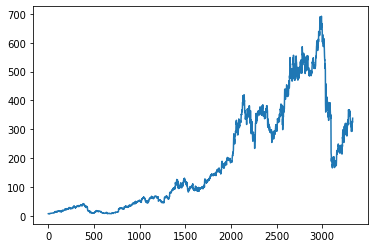

In [25]:
y = df['Price']
plt.plot(y)
plt.show()

## Heatmap corr

In [26]:
df.corr()

,Price,Open,High,Low
Price,1.000000,0.999541,0.999797,0.999783
Open,0.999541,1.000000,0.999788,0.999788
High,0.999797,0.999788,1.000000,0.999729
Low,0.999783,0.999788,0.999729,1.000000


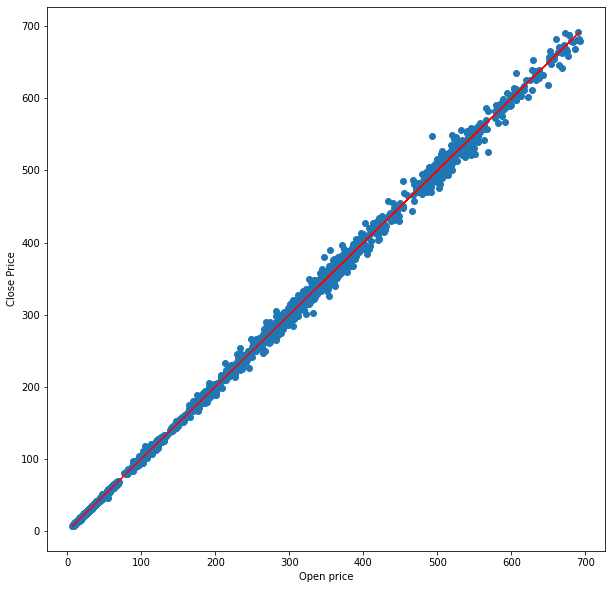

In [27]:
# Mengatur ukuran gambar
fig = plt.figure(figsize=(10, 10))

nilaix = df['Open']
nilaiy= df['Price']

slope, intercept, r, p, std_err = stats.linregress(nilaix, nilaiy)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, nilaix))

plt.xlabel("Open price")
plt.ylabel("Close Price")
plt.scatter(nilaix,nilaiy)
plt.plot(nilaix,mymodel,color='r')
plt.show()

### create model multiple regression

In [28]:
valueX = ['Open','High','Low']
X_train = df[valueX]
trainY = df['Price']
trainY_check = df['Price'].values.tolist()

In [29]:
linear = LinearRegression()
linear.fit(X_train,trainY)

LinearRegression()

In [30]:
print("Making predictions for the following 5:")
print(X_train.head(10))
print("The predictions Price are")
print(linear.predict(X_train.head(10)))

Making predictions for the following 5:
   Open  High   Low
0  7.93  7.96  7.57
1  7.65  7.66  7.26
2  7.36  7.67  7.20
3  7.73  7.76  7.46
4  7.50  7.74  7.47
5  7.66  7.70  7.53
6  7.53  7.58  7.45
7  7.61  7.75  7.56
8  7.52  7.58  7.27
9  7.25  7.41  7.23
The predictions Price are
[7.71030267 7.39052259 7.52482778 7.58089398 7.70986629 7.62882531
 7.54617372 7.72287312 7.4109775  7.40267383]


In [31]:
data_predict = linear.predict(X_train)

### plot data actual all 

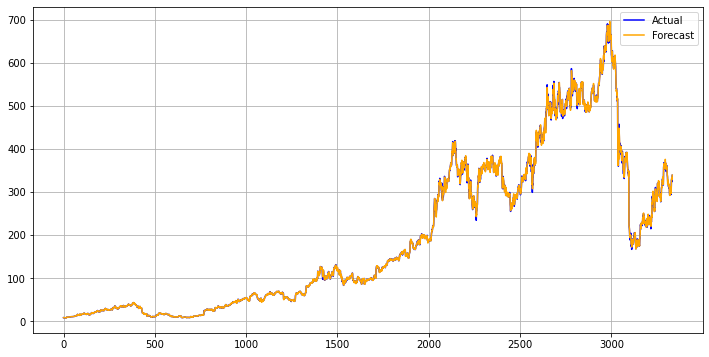

In [32]:
plt.figure(figsize = (12,6))
plt.plot(trainY_check , 'b' , label = 'Actual')
plt.plot(data_predict , 'orange' , label = 'Forecast')
plt.grid()
plt.legend()
plt.show()

In [33]:
rmse2022 = mean_squared_error(trainY, data_predict, squared=False)
print("Root Mean Squared Error:", rmse2022)

Root Mean Squared Error: 2.3997078371380987


In [34]:
print("mean absolute error", mean_absolute_error(trainY,data_predict))

mean absolute error 1.3443839184883266


### split data for train and test data

In [35]:
valueTrain = ['Open','High','Low']
X = df[valueTrain]
y = df['Price']

In [36]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.4, shuffle=False)
# Define model
linearTrain = LinearRegression()
# Fit model
linearTrain.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = linearTrain.predict(val_X)

In [37]:
intercept =linearTrain.intercept_
coefficients = linearTrain.coef_

In [38]:
# Setelah model dilatih
coef = linearTrain.coef_
intercept = linearTrain.intercept_

# Menampilkan Intercept
print("Intercept:", intercept)

# Menampilkan Koefisien dengan Nama Variabel yang Sesuai
for feature_name, coef_value in zip(X.columns, coef):
    print(f"Coefficient for {feature_name}: {coef_value}")

Intercept: -0.027404213450509474
Coefficient for Open: -0.5329088455214942
Coefficient for High: 0.7984378364399003
Coefficient for Low: 0.7347146936067156


In [39]:
intercept

-0.027404213450509474

In [40]:
coefficients

array([-0.53290885,  0.79843784,  0.73471469])

In [41]:
train_y.shape

(2000,)

In [42]:
val_y.shape

(1334,)

In [43]:
testy_check = val_y.values.tolist()

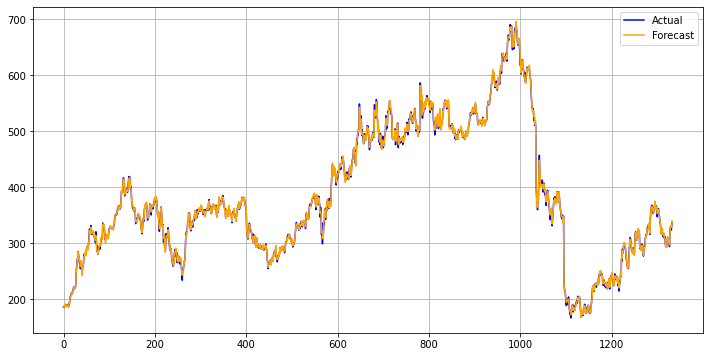

In [44]:
fig = plt.figure(figsize=(12, 6))
#plt.figure(figsize = (12,6))
plt.plot(testy_check , 'b' , label = 'Actual')
plt.plot(val_predictions , 'orange' , label = 'Forecast')
plt.grid()
plt.legend()
plt.show()

fig.savefig('nama_file.png', dpi=800)

In [45]:
rmse = mean_squared_error(val_y, val_predictions, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.73392528813137


In [46]:
print("mean absolute error", mean_absolute_error(val_y,val_predictions))

mean absolute error 2.8016591623125064


In [47]:
print("train score", linearTrain.score(train_X,train_y))
print("test score", linearTrain.score(val_X,val_y))

train score 0.9998329514239943
test score 0.9990045871430902


In [48]:
val_X.head(10)

,Open,High,Low
2000,187.85,189.42,185.91
2001,186.01,187.85,184.82
2002,186.10,188.69,185.41
2003,187.98,192.64,187.20
2004,189.61,191.43,188.01
2005,191.20,191.65,188.90
2006,190.18,190.30,185.75
2007,187.94,189.11,185.26
2008,189.44,190.95,187.58
2009,188.33,190.95,186.80


In [49]:
print("Making predictions for the following 5:")
print(val_y.head(10))
print("The predictions Close price are")
print(linearTrain.predict(val_X.head(10)))

Making predictions for the following 5:
2000    186.22
2001    185.73
2002    187.86
2003    189.56
2004    190.12
2005    190.42
2006    187.02
2007    188.82
2008    188.62
2009    189.94
Name: Price, dtype: float64
The predictions Close price are
[187.69657282 186.62273868 187.67894633 191.14604646 189.90641416
 189.8886415  187.03996616 186.92353075 189.29783119 189.31628254]


In [50]:
count = 0
predic_index = 0

for loopX in range(3000, 3334):
    check = abs(val_y.loc[loopX] - val_predictions[predic_index])
    predic_index += 1
    if check <= 4:
        count += 1

print(count)

9


In [51]:
persentase = (count * 100) / 334
print(persentase)

2.694610778443114


In [52]:
val_y[3333]

338.43

# HOW ABOUT SPLIT DATA with normalized data

In [53]:
scaler = MinMaxScaler()

In [54]:
col_to_normalize = ['Price','Open','High','Low']

In [55]:
df_norm[col_to_normalize] = scaler.fit_transform(df_norm[col_to_normalize])

In [56]:
df_norm.head()

,Date,Price,Open,High,Low
0,01/04/2010,0.000906,0.001415,0.001124,0.000942
1,01/05/2010,0.000497,0.001007,0.000692,0.000486
2,01/06/2010,0.000876,0.000584,0.000706,0.000398
3,01/07/2010,0.000686,0.001123,0.000836,0.000780
4,01/08/2010,0.000862,0.000788,0.000807,0.000795
